In [1]:
import sklearn
import cv2 as cv2
import os
import numpy as np
import matplotlib.pyplot as plt

from Model_HOG_SVM import model_HOG_SVM

In [2]:
def raise_eception(error_str):
    print(error_str)
    raise  Exception(error_str)

def get_raw_img_seq(seq_path):
    imgs= os.listdir(seq_path)
    i = 0
    imgs_list = []
    for img in imgs:
        img_path = seq_path + "/" + img
        if os.path.isdir(img):
            raise_eception("is dir!  " + str(img))
        curr_img = cv2.imread(img_path)
        if curr_img is None:
            raise_eception('is None!' + str(img))
        # print(curr_img.shape)
        imgs_list.append(curr_img)
        if imgs_list[0].shape != curr_img.shape:
            raise_eception("Different shape! " + str(imgs_list[0].shape) + " != " + str(curr_img.shape))
    return np.array(imgs_list)
        

In [3]:
def get_sequence_file(seqfile_name, seq_path = None):
    try:
        seq = np.load(seqfile_name)
        return seq
    except:
        print('Cannot find seq file -> start loading seq images')
        if seq_path is None:
            raise_eception('Cannot load seq file and seq path is None! ')
        else:
            seq = get_raw_img_seq(seq_path)
            np.save(seqfile_name, seq)
            return seq

def get_proposals_features(imgs_list, model):
    proposals = []
    features = []
    return proposals, features 

def save_proposals_features():
    pass


In [4]:
imgs_list = get_sequence_file('img_seq.npy', './sequence')

In [5]:
def bgr_to_rgb(image):
    b,g,r = cv2.split(image)
    return cv2.merge([r,g,b])

def draw_proposal(img, proposal):
    x, y, w, h = proposal
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)

def draw_people_proposals(img, proposals):
    img2 = img.copy()
    for person in proposals:
        draw_proposal(img2, person)
    return img2

In [6]:
model = model_HOG_SVM()

In [7]:
img = imgs_list[0]

# detect single image
proposals, features = model.detect(img)

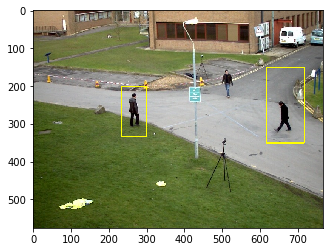

In [8]:
img2 = draw_people_proposals(img, proposals)

plt.imshow(bgr_to_rgb(img2))

In [ ]:
# Dump tracking placehoder
def get_tracking(sequence):
    # sequence[nFrames, height, width, channels=3]
    # return [nFrames]: [nProposals]: ['id', u, v, r, h, v_x, v_y, v_r, v_h]    
    # u, v: bounding box center position
    # r: aspect ratio
    # h: height
    # v_: velocity in following directions
    def make_frame_tracking():
        id = 0.0
        u = 0.0
        v = 0.0
        r = 0.0
        h = 0.0
        v_x = 0.0
        v_y = 0.0
        v_r = 0.0
        v_h = 0.0
        return [id, u, v, r, h, v_x, v_y, v_r, v_h]
    return [[make_frame_tracking()]] * len(sequence) 

